In [77]:
#predictive analytics project ca2

#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [78]:
#loading data set
df=pd.read_csv("C:/Users/ganiv/OneDrive/Desktop/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [79]:
# EDA analysis or dataset information
print(df.shape)
print(df.info())
print(df.isnull().sum())

(32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
person_age    

In [80]:
# Drop exact duplicates
df = df.drop_duplicates()

In [81]:
# Fill numerical missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True) # Median is used for employment length because it contains outliers
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True) # while mean is used for interest rate since it follows a normal distribution without extreme values.
df.isnull().sum()

C:\Users\ganiv\AppData\Local\Temp\ipykernel_25832\287795341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True) # Median is used for employment length because it contains outliers
C:\Users\ganiv\AppData\Local\Temp\ipykernel_25832\287795341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [82]:
# split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [83]:
#identify numerical& catagorical columns
numerical_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols=X.select_dtypes(include=['object']).columns.tolist()
print(f"numerical features:{numerical_cols}")
print(f"categorical features:{categorical_cols}")

numerical features:['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical features:['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [84]:
# Preprocessing for numerical features: impute + scale
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Preprocessing for categorical features: impute + encode
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
#Step 6: Combine both using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [85]:
#Step 7: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
#models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}


In [88]:
#Create Full Pipelines & Train Models

results = []
for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

In [89]:
# comparative analysis table
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.865669,0.768924,0.547130,0.639337
1,Decision Tree,0.886027,0.725503,0.766123,0.745260
2,Random Forest,0.932912,0.967433,0.715804,0.822811
3,KNN,0.892196,0.860324,0.602410,0.708629
4,SVM,0.914405,0.939425,0.648476,0.767296


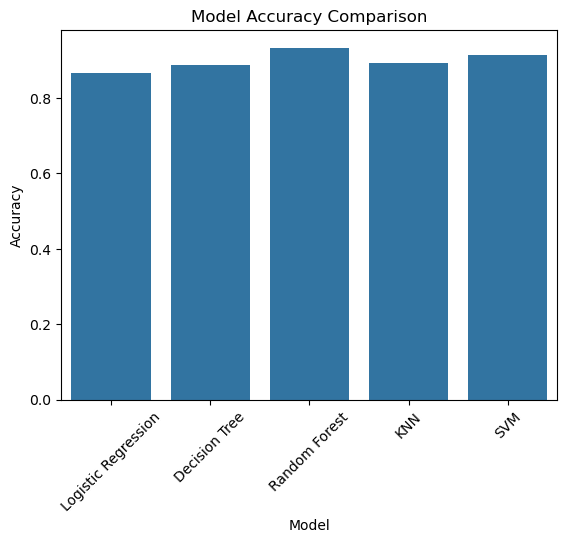

In [90]:
# Accuracy Comparison Visualization
plt.figure()
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()

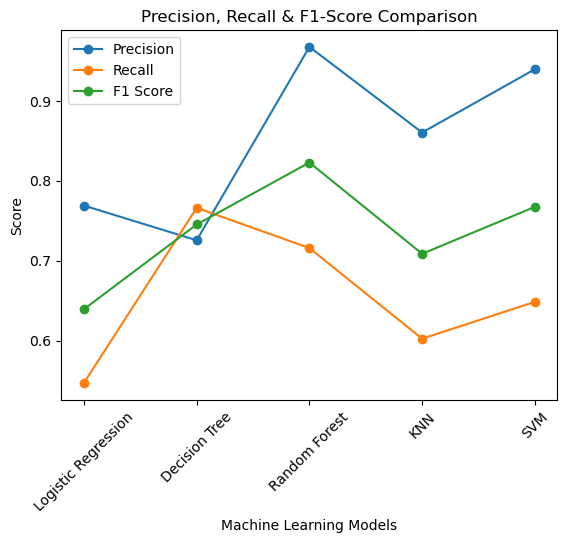

In [97]:
#Precision, Recall & F1-Score Comparison at a time
plt.figure()
plt.plot(results_df['Model'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Model'], results_df['Recall'], marker='o', label='Recall')
plt.plot(results_df['Model'], results_df['F1 Score'], marker='o', label='F1 Score')
plt.xticks(rotation=45)
plt.title("Precision, Recall & F1-Score Comparison")
plt.ylabel("Score")
plt.xlabel("Machine Learning Models")
plt.legend()
plt.show()
#In classification problems (like loan status prediction), the best model is usually chosen based on:
#High F1-score (most important)

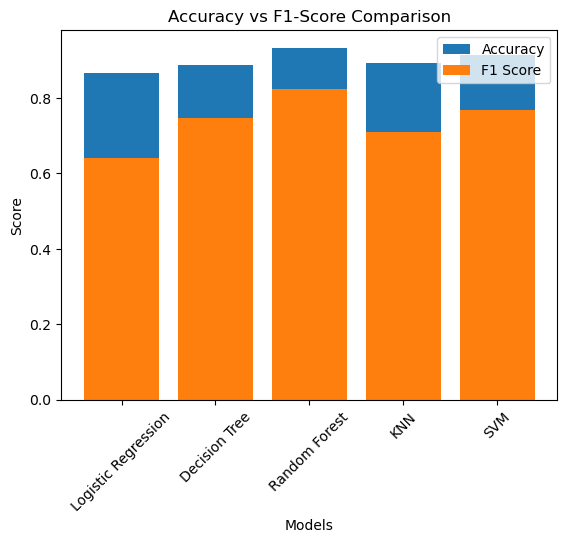

In [98]:
#Accuracy vs F1-Score (Comparison View)

plt.figure()
plt.bar(results_df['Model'], results_df['Accuracy'], label='Accuracy')
plt.bar(results_df['Model'], results_df['F1 Score'], label='F1 Score')
plt.xticks(rotation=45)
plt.title("Accuracy vs F1-Score Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend()
plt.show()

In [ ]:
# conclusion

# The Random Forest classifier achieved the highest accuracy and showed balanced performance across all evaluation metrics, 
# making it the most suitable model for loan default prediction.

#or
#The Random Forest model performs best as it has the highest F1-score and a good balance between precision and recall.

#or

#at last we can say that random forest and svm models are good to predicting loan default risk in the given dataset.